In [5]:
# get index data
import pandas as pd
indexcd=pd.read_csv('TRD_Index_20.csv',index_col='Trddt')
mktcd=indexcd[indexcd.Indexcd==902]
mktcd.head()

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014/1/2,902,4,3014.540,3029.042,3006.146,3028.749,0.002563
2014/1/3,902,5,3019.490,3022.980,2988.794,3001.462,-0.009009
2014/1/6,902,1,2995.242,2995.242,2922.058,2927.477,-0.024650
2014/1/7,902,2,2911.057,2943.681,2905.071,2938.602,0.003800
2014/1/8,902,3,2942.276,2972.339,2933.970,2950.733,0.004128


In [6]:
mktret=pd.Series(mktcd.Retindex.values,index=pd.to_datetime(mktcd.index))
mktret.name='mktret'
mktret.head()

Trddt
2014-01-02    0.002563
2014-01-03   -0.009009
2014-01-06   -0.024650
2014-01-07    0.003800
2014-01-08    0.004128
Name: mktret, dtype: float64

In [7]:
mktret=mktret['2014-01-02':'2014']
mktret.tail()

Trddt
2014-12-25    0.024282
2014-12-26    0.020379
2014-12-29   -0.005938
2014-12-30   -0.008057
2014-12-31    0.015834
Name: mktret, dtype: float64

In [8]:
# get stock value data
xin_an=pd.read_csv('xin_an.csv',index_col='Date')
xin_an.index=pd.to_datetime(xin_an.index)
xin_an.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-01,1,10.59,10.59,10.59,10.59,0
2014-01-02,2,10.62,10.99,10.58,10.96,10984100
2014-01-03,3,10.89,11.04,10.71,10.85,7629900
2014-01-06,4,10.83,10.83,10.00,10.10,14364700
2014-01-07,5,10.05,10.22,9.95,10.11,5219100


In [10]:
# we have to remove these data on non trading days (volume=0)
xin_an=xin_an[xin_an.Volume!=0]

In [11]:
# compute returns using closing prices
xin_anret=(xin_an.Close-xin_an.Close.shift(1))/xin_an.Close.shift(1)
xin_anret.name='returns'
xin_anret=xin_anret.dropna()
xin_anret.head()

Date
2014-01-03   -0.010036
2014-01-06   -0.069124
2014-01-07    0.000990
2014-01-08   -0.004946
2014-01-09   -0.017893
Name: returns, dtype: float64

In [12]:
xin_anret.tail()

Date
2014-12-25    0.000000
2014-12-26    0.003724
2014-12-29   -0.027829
2014-12-30   -0.015267
2014-12-31    0.005814
Name: returns, dtype: float64

In [14]:
# combine xin_an and the market index and compare
Ret=pd.merge(pd.DataFrame(mktret),pd.DataFrame(xin_anret),left_index=True,right_index=True,how='inner')
Ret.head()

,mktret,returns
2014-01-03,-0.009009,-0.010036
2014-01-06,-0.024650,-0.069124
2014-01-07,0.003800,0.000990
2014-01-08,0.004128,-0.004946
2014-01-09,-0.011499,-0.017893


In [15]:
# daily riskless return rate
rf=1.036**(1/360)-1
rf

9.824689212445392e-05

In [16]:
# risk premium
Eret=Ret-rf
Eret.head()

,mktret,returns
2014-01-03,-0.009107,-0.010135
2014-01-06,-0.024748,-0.069223
2014-01-07,0.003702,0.000892
2014-01-08,0.004030,-0.005044
2014-01-09,-0.011597,-0.017991


Text(0.5,1,'XinAnGuFen return and market return')

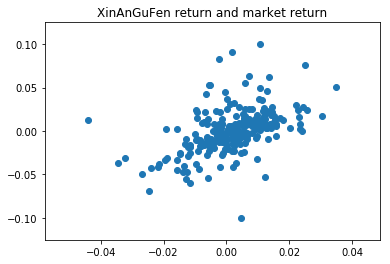

In [18]:
# scatter plot
# we have to remove the datatype of Eret
import matplotlib.pyplot as plt
plt.scatter(Eret.values[:,0],Eret.values[:,1])
plt.title('XinAnGuFen return and market return')

In [20]:
# regression fitting (with excessive return '\alpha')
import statsmodels.api as sm
model=sm.OLS(Eret.returns[1:],sm.add_constant(Eret.mktret[1:]))
result=model.fit()
result.summary()
# \alpha is not significant and from \beta we know xin_an is more volatile than the market 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     75.99
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           4.78e-16
Time:                        20:57:58   Log-Likelihood:                 575.64
No. Observations:                 242   AIC:                            -1147.
Df Residuals:                     240   BIC:                            -1140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.154      0.250      -0.005       0.001
mktret         1.1299      0.130      8.717      0.000       0.875       1.385
==============================================================================
Omnibus:                       46.845   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.834
Skew:                           0.658   Prob(JB):                     3.69e-47
Kurtosis:                       7.413   Cond. No.                         89.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""